<a href="https://colab.research.google.com/github/JoseFBG/CIENCIA_DATOS_2025/blob/main/Tarea_15_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install statsmodels

In [2]:
!pip install wquantiles

In [3]:
import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
ingresos=pd.read_csv("/content/base_datos_cuantitativas.csv")
#ver los 5 primeros registros
ingresos.head()

,Edad,Ingresos_mensuales,Horas_estudio,Horas_trabajo
0,26,2390,7,59
1,43,4003,34,23
2,19,2478,13,21
3,37,4499,16,25
4,45,3556,35,23


In [5]:
ingresos. tail(5)

,Edad,Ingresos_mensuales,Horas_estudio,Horas_trabajo
0,26,2390,7,59
1,43,4003,34,23
2,19,2478,13,21
3,37,4499,16,25
4,45,3556,35,23


In [6]:
ingresos.sample(5)

,Edad,Ingresos_mensuales,Horas_estudio,Horas_trabajo
0,26,2390,7,59
2,19,2478,13,21
1,43,4003,34,23
4,45,3556,35,23
3,37,4499,16,25


In [7]:
ingresos.describe()

,Edad,Ingresos_mensuales,Horas_estudio,Horas_trabajo
count,5.00000,5.000000,5.000000,5.000000
mean,34.00000,3385.200000,21.000000,30.200000
std,11.18034,930.703336,12.747549,16.161683
min,19.00000,2390.000000,7.000000,21.000000
25%,26.00000,2478.000000,13.000000,23.000000
50%,37.00000,3556.000000,16.000000,23.000000
75%,43.00000,4003.000000,34.000000,25.000000
max,45.00000,4499.000000,35.000000,59.000000


In [8]:
ingresos.columns

Index(['Edad', 'Ingresos_mensuales', 'Horas_estudio', 'Horas_trabajo'], dtype='object')

In [9]:
ingresos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Edad                5 non-null      int64
 1   Ingresos_mensuales  5 non-null      int64
 2   Horas_estudio       5 non-null      int64
 3   Horas_trabajo       5 non-null      int64
dtypes: int64(4)
memory usage: 292.0 bytes


In [11]:
#media
ingresos["Ingresos_mensuales"].mean()

np.float64(3385.2)

In [12]:
#mediana
ingresos["Ingresos_mensuales"].median()

3556.0

In [13]:
#media truncada
trim_mean(ingresos.Ingresos_mensuales,0.1)

np.float64(3385.2)

In [14]:
#media de edad
ingresos["Edad"].mean()

np.float64(34.0)

In [15]:
#mediana
ingresos["Edad"].median()

37.0

In [17]:
#mediana ponderada con  al ingreso mensual
np.average(ingresos["Edad"], weights=ingresos.Ingresos_mensuales)

np.float64(35.911260782228524)

In [18]:
#media ponderada de Edad
wquantiles.median(ingresos["Edad"], weights=ingresos.Ingresos_mensuales)

np.float64(38.89908256880734)

<Axes: >

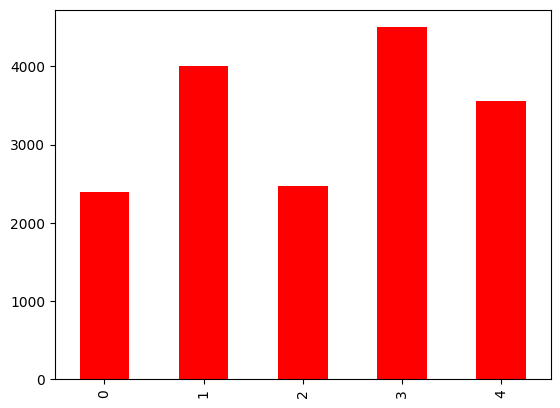

In [19]:
ingresos["Ingresos_mensuales"].plot.bar(color="red")

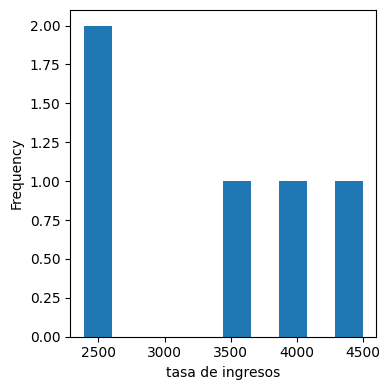

In [20]:
ax=(ingresos["Ingresos_mensuales"]).plot.hist(figsize=(4,4))
ax.set_xlabel("tasa de ingresos")
plt.tight_layout()
plt.show()

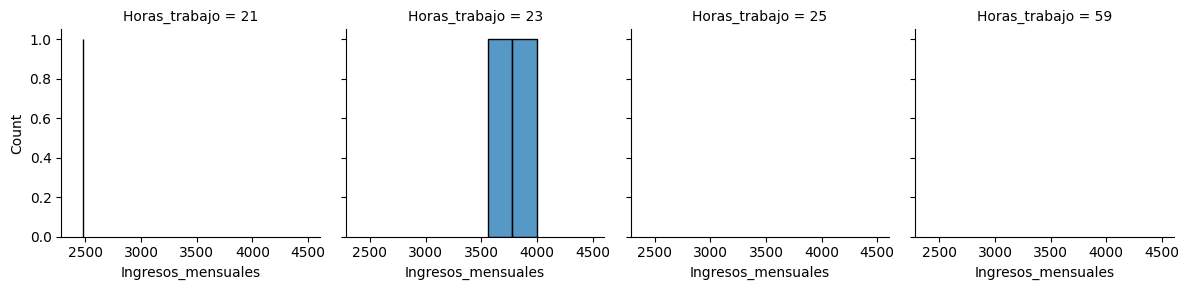

In [21]:
analisis=ingresos.head()
g=sns.FacetGrid(analisis,col="Horas_trabajo")
g.map(sns.histplot,"Ingresos_mensuales")
